# 4 統計処理のための基本的な操作

## 4.1 基本的なソフトウェアライブラリ

### 4.1.1 ライブラリの読込み

In [1]:
import pandas as pd         # pandasを 'pd' という名で読込み
import numpy as np          # numpyを 'np' という名で読込み
from scipy import stats     # scipy.stats の読込み

## 4.2 乱数生成の初期状態について

In [2]:
stats.uniform.rvs(loc=-1,scale=2,size=5)    # -1以上，1未満の乱数を5個生成

array([-0.58954757,  0.4099639 , -0.92735171,  0.31520341,  0.99377964])

In [3]:
stats.uniform.rvs(loc=-1,scale=2,size=5)

array([-0.54682844,  0.83759749, -0.85046024, -0.19493831,  0.41476075])

### 4.2.1 得られる乱数の系列について

In [4]:
stats.uniform.rvs(loc=-1,scale=2,size=5,random_state=2)   # 種を与えて乱数生成

array([-0.1280102 , -0.94814754,  0.09932496, -0.12935521, -0.1592644 ])

In [5]:
stats.uniform.rvs(loc=-1,scale=2,size=5,random_state=2)   # 種を与えて乱数生成

array([-0.1280102 , -0.94814754,  0.09932496, -0.12935521, -0.1592644 ])

## 4.3 サンプルデータの作成

In [6]:
# 正規分布（μ=0,σ=1）に沿った乱数生成（10,000個のデータ）
y1 = stats.norm.rvs(loc=0,scale=1,size=10000,random_state=3)
# 対数正規分布（μ=0,σ=1）に沿った乱数生成（10,000個のデータ）
y2 = stats.lognorm.rvs(loc=0,s=1,size=10000,random_state=1)

In [7]:
df = pd.DataFrame(columns=['Norm','LogNorm'])   # DataFrameを用意
df['Norm'] = y1;    df['LogNorm'] = y2          # y1, y2 を DataFrame にセット

In [8]:
df.info()       # DataFrame の情報表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Norm     10000 non-null  float64
 1   LogNorm  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


## 4.4 データの分析

In [9]:
dsum = df.describe()    # 要約統計量
display( dsum )
print( '--------' )
print( type(dsum) )

Norm       LogNorm
count  10000.000000  10000.000000
mean      -0.027658      1.673458
std        0.995936      2.299659
min       -3.749941      0.025824
25%       -0.699782      0.515342
50%       -0.028991      1.008490
75%        0.646364      1.957775
max        4.091393     56.083915

--------
<class 'pandas.core.frame.DataFrame'>


In [10]:
dsum.loc['std','Norm']  # 通常のDataFrameとしてアクセスできる

0.9959356956406281

### 4.4.1 分位数（パーセンタイル，パーセント点）

In [11]:
df.quantile( q=0.05 )

Norm      -1.671452
LogNorm    0.197979
Name: 0.05, dtype: float64

In [12]:
df.quantile( q=[0.05, 0.95] )

Norm   LogNorm
0.05 -1.671452  0.197979
0.95  1.619248  5.327082

#### 4.4.1.1 中央値

In [13]:
df.quantile( q=0.5 )    # 中央値

Norm      -0.028991
LogNorm    1.008490
Name: 0.5, dtype: float64

In [14]:
df.median()     # 中央値

Norm      -0.028991
LogNorm    1.008490
dtype: float64

### 4.4.2 基本的な統計量

In [15]:
df.count()    # データ個数

Norm       10000
LogNorm    10000
dtype: int64

#### 4.4.2.1 最大値，最小値

In [16]:
df.max()    # 最大値

Norm        4.091393
LogNorm    56.083915
dtype: float64

In [17]:
df.min()    # 最小値

Norm      -3.749941
LogNorm    0.025824
dtype: float64

#### 4.4.2.2.合計

In [18]:
df.sum()    # DataFrameに対する合計処理

Norm        -276.584894
LogNorm    16734.578765
dtype: float64

In [19]:
df['Norm'].sum()    # 特定のカラムに対する合計処理

-276.5848939275271

#### 4.4.2.3 平均

In [20]:
df.mean()   # DataFrameの平均値算出

Norm      -0.027658
LogNorm    1.673458
dtype: float64

In [21]:
df['Norm'].mean()   # 特定のカラムの平均値算出

-0.02765848939275271

#### 4.4.2.4 分散（不偏分散，標本分散）

In [22]:
df.var()    # DataFrameの分散算出

Norm       0.991888
LogNorm    5.288432
dtype: float64

In [23]:
df['Norm'].var()    # 特定のカラムの分散算出

0.9918879098511819

In [24]:
df['Norm'].var( ddof=0 )    # 標本分散

0.9917887210601968

In [25]:
df['Norm'].var( ddof=1 )    # 不偏分散

0.9918879098511819

#### 4.4.2.5 標準偏差（不偏標準偏差／標本標準偏差）

In [26]:
df.std()      # DataFrameの標準偏差

Norm       0.995936
LogNorm    2.299659
dtype: float64

In [27]:
df['Norm'].std()    # 特定のカラムの標準偏差

0.9959356956406281

In [28]:
df['Norm'].std( ddof=0 )    # 標本標準偏差

0.9958858976108642

In [29]:
df['Norm'].std( ddof=1 )    # 不偏標準偏差

0.9959356956406281

#### 4.4.2.6 尖度，歪度

In [30]:
df.kurt()   # 尖度

Norm        0.003204
LogNorm    96.447775
dtype: float64

In [31]:
df['Norm'].kurt()   # 特定のカラムの尖度

0.003203974884875116

In [32]:
df.skew()   # 歪度

Norm       0.028590
LogNorm    6.903523
dtype: float64

In [33]:
df['LogNorm'].skew()    # 特定のカラムの歪度

6.9035227025905455

#### 4.4.2.7　配列（ndarray）の統計量の算出

In [34]:
print(   np.quantile( df['Norm'].to_numpy(), 0.05 ) )   # 比率で指定
print( np.percentile( df['Norm'].to_numpy(), 5    ) )   # 百分率で指定

-1.6714519660353444
-1.6714519660353444


In [35]:
print( '中央値:　', np.median( df['Norm'].to_numpy() ) )          # 中央値
print( '最大値:　',    np.max( df['Norm'].to_numpy() ) )          # 最大値
print( '最小値:　',    np.min( df['Norm'].to_numpy() ) )          # 最小値
print( '合計:　　',    np.sum( df['Norm'].to_numpy() ) )          # 合計
print( '平均:　　',   np.mean( df['Norm'].to_numpy() ) )          # 平均
print( '分散:　　',    np.var( df['Norm'].to_numpy(), ddof=1 ) )  # 不偏分散
print( '標準偏差:',    np.std( df['Norm'].to_numpy(), ddof=1 ) )  # 不偏標準偏差

中央値:　 -0.028991402777364617
最大値:　 4.091392759573651
最小値:　 -3.749940780113589
合計:　　 -276.5848939275271
平均:　　 -0.02765848939275271
分散:　　 0.9918879098511819
標準偏差: 0.9959356956406281


### 4.4.3 要素，区間毎のデータ個数の調査

#### 4.4.3.1 要素の個数の調査

In [36]:
sr = pd.Series(['a','b','b','c','c','c'])   # サンプルデータ
c = sr.value_counts()
print( c )          # 内容確認
print( '--------' )
print( type(c) )    # データ型の調査

c    3
b    2
a    1
dtype: int64
--------
<class 'pandas.core.series.Series'>


#### 4.4.3.2 最頻値

In [37]:
sr.mode()      # 最頻値

0    c
dtype: object

In [38]:
sr2 = pd.Series(['a','b','b','b','c','c'])  # サンプルデータ2
sr3 = pd.Series(['b','b','b','c','c','c'])  # サンプルデータ3
# DataFrameを作成
df4 = pd.DataFrame( columns=['col1','col2','col3'] )
df4['col1'] = sr;   df4['col2'] = sr2;    df4['col3'] = sr3
df4     # 内容確認

col1 col2 col3
0    a    a    b
1    b    b    b
2    b    b    b
3    c    b    c
4    c    c    c
5    c    c    c

In [39]:
df4.mode()  # DataFrameの最頻値

col1 col2 col3
0    c    b    b
1  NaN  NaN    c

#### 4.4.3.3 区間毎の要素の個数の調査

In [40]:
B0 = df['Norm'].value_counts(bins=20)   # 度数の区間を20等分して度数調査
print( B0.head(3) )                     # 先頭3要素を表示
print( '--------' )
print( 'データ個数:', len(B0) )

(-0.221, 0.171]     1517
(-0.613, -0.221]    1475
(0.171, 0.563]      1457
Name: Norm, dtype: int64
--------
データ個数: 20


In [41]:
B0.sort_index(inplace=True)     # インデックス（区間）でソート

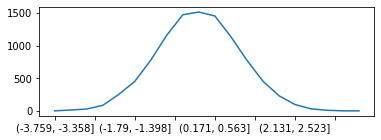

In [42]:
import matplotlib.pyplot as plt # グラフ描画ライブラリを 'plt' の名で読込み
plt.figure()                # 描画の準備
B0.plot( figsize=(6,2) )    # 描画処理（サイズ指定）
plt.show()                  # 表示

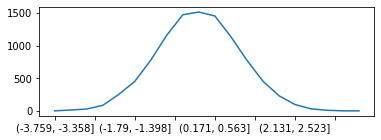

In [43]:
plt.figure()                # 描画の準備
B0.plot( figsize=(6,2) )    # 描画処理（サイズ指定）
plt.savefig( 'histogram00.eps' )
plt.show()

In [44]:
B1 = df['LogNorm'].value_counts(bins=50)    # 度数の区間を50等分して度数調査
B1.sort_index(inplace=True)     # インデックス（区間）でソート

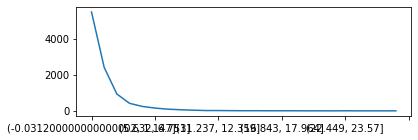

In [45]:
plt.figure()                # 描画の準備
B1.head(25).plot( figsize=(6,2) )   # 描画処理（サイズ指定）
plt.show()                  # 表示

#### 4.4.3.4 最頻の区間

In [46]:
B0.max()

1517

In [47]:
B0.iloc[ list(B0 == B0.max()) ]

(-0.221, 0.171]    1517
Name: Norm, dtype: int64

#### 4.4.3.5 区間（Intervalオブジェクト）

In [48]:
r = B0.index[0]                     # 最初の「区間」の取り出し
print( '区間のデータ型:', type(r) )
r       # 内容確認

区間のデータ型: <class 'pandas._libs.interval.Interval'>


Interval(-3.759, -3.358, closed='right')

In [49]:
print( '下限:', r.left )
print( '上限:', r.right )
print( '閉区間:', r.closed )

下限: -3.759
上限: -3.358
閉区間: right


In [50]:
iv = pd.Interval( 2.0, 3.0, closed='right' )
print( iv )

(2.0, 3.0]


In [51]:
print( '2.5∈(2.0,3.0] :', 2.5 in iv )
print( '2.0∈(2.0,3.0] :', 2.0 in iv )
print( '3.0∈(2.0,3.0] :', 3.0 in iv )

2.5∈(2.0,3.0] : True
2.0∈(2.0,3.0] : False
3.0∈(2.0,3.0] : True


## 4.5 データの可視化

### 4.5.1 matplotlibによる作図の手順

In [52]:
import matplotlib.pyplot as plt # グラフ描画ライブラリを 'plt' の名で読込み

### 4.5.2 ヒストグラムの作成

array([[<AxesSubplot:title={'center':'Norm'}>,
        <AxesSubplot:title={'center':'LogNorm'}>]], dtype=object)

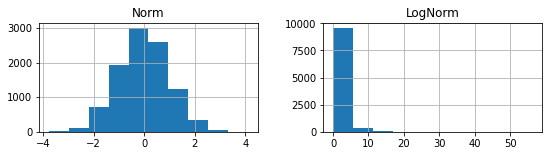

In [53]:
df.hist( figsize=(9,2) )       # ヒストグラムの作成処理

<Figure size 432x288 with 0 Axes>

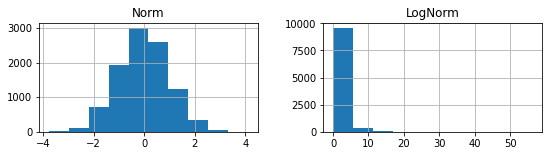

In [54]:
plt.figure()    # 描画の準備
df.hist( figsize=(9,2) )       # ヒストグラムの作成処理
plt.savefig('histogram01.eps')

<AxesSubplot:>

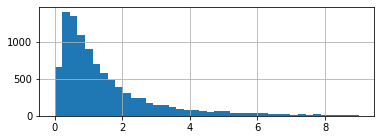

In [55]:
df['LogNorm'].hist( bins=40,        # 階級の数
                    range=(0,9),    # 範囲
                    figsize=(6,2) ) # 図の大きさ

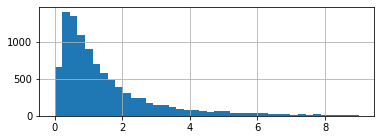

In [56]:
plt.figure()
df['LogNorm'].hist( bins=40,        # 階級の数
                    range=(0,9),    # 範囲
                    figsize=(6,2) ) # 図の大きさ
plt.savefig('histLogNorm01.eps')
plt.show()

#### 4.5.2.1 ヒストグラム作成方法のバリエーション

<AxesSubplot:ylabel='Frequency'>

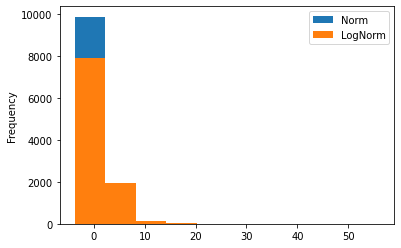

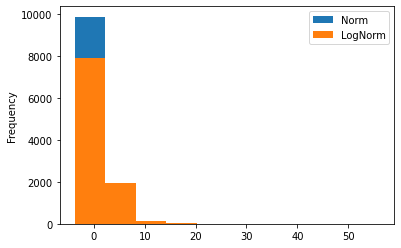

In [57]:
df.plot(kind='hist')
df.plot.hist()

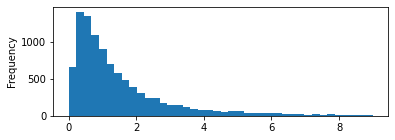

In [58]:
plt.figure()
df['LogNorm'].plot( kind='hist',bins=40,range=(0,9),figsize=(6,2) )
plt.savefig('histLogNorm02.eps')
plt.show()

<AxesSubplot:ylabel='Frequency'>

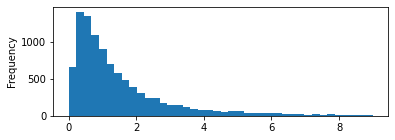

In [59]:
df['LogNorm'].plot.hist( bins=40,range=(0,9),figsize=(6,2) )

### 4.5.3 図を画像ファイルとして保存する方法

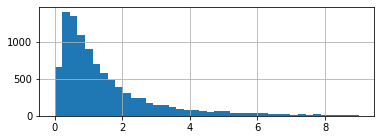

In [60]:
plt.figure()
df['LogNorm'].hist( bins=40,        # 階級の数
                    range=(0,9),    # 範囲
                    figsize=(6,2) ) # 図の大きさ
plt.savefig( 'histLogNorm01.eps' )  # 画像ファイルとして保存

### 4.5.4 複数の図を重ねて表示する方法

<AxesSubplot:>

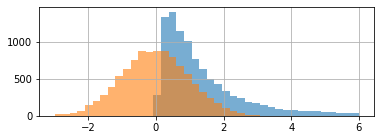

In [61]:
df['LogNorm'].hist( bins=40,        # 階級の数
                    range=(-3,6),   # 範囲
                    alpha=0.6,      # アルファ値（不透明度）
                    figsize=(6,2) ) # 図の大きさ
df['Norm'].hist( bins=40,           # 階級の数
                    range=(-3,6),   # 範囲
                    alpha=0.6 )     # アルファ値（不透明度）

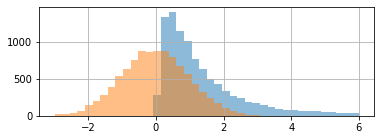

In [62]:
plt.figure()
df['LogNorm'].hist( bins=40,        # 階級の数
                    range=(-3,6),   # 範囲
                    alpha=0.5,      # アルファ値（不透明度）
                    figsize=(6,2) ) # 図の大きさ
df['Norm'].hist( bins=40,           # 階級の数
                    range=(-3,6),   # 範囲
                    alpha=0.5 )     # アルファ値（不透明度）
plt.savefig( 'histLogAndNorm01.svg' )

### 4.5.5　箱ひげ図の作成

<Figure size 432x288 with 0 Axes>

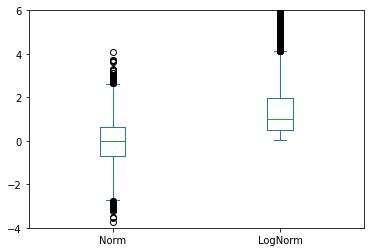

In [63]:
plt.figure()            # 描画開始
df.plot(kind='box')     # 箱ひげ図
plt.ylim(-4,6)
plt.show()

<Figure size 432x288 with 0 Axes>

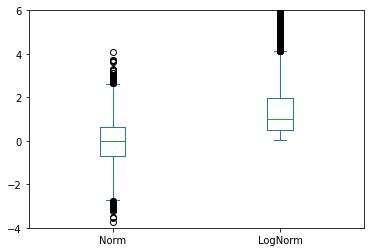

In [64]:
plt.figure()            # 描画開始
df.plot(kind='box')     # 箱ひげ図
plt.ylim(-4,6)
plt.savefig('boxLogAndNorm01.eps')
plt.show()

<Figure size 432x288 with 0 Axes>

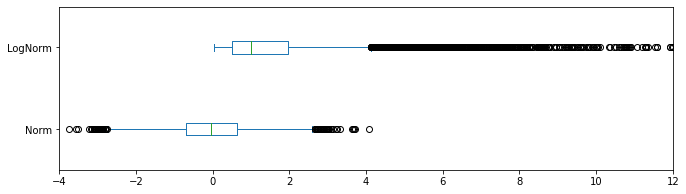

In [65]:
plt.figure()              # 描画開始
df.plot.box(vert=False,figsize=(11,3))   # 箱ひげ図（横向き）
plt.xlim(-4,12)
plt.savefig('boxLogAndNorm02.eps')
plt.show()

### 4.5.6　折れ線グラフの作成

In [66]:
import numpy as np              # NumPyを 'np' という名で読込み
x = np.arange(-3.14,3.14,0.3)                  # sin,cosの定義域を生成
y1 = np.sin(x);     y2 = np.cos(x)              # sin,cosのデータ列を生成
df2 = pd.DataFrame(columns=['x','sin','cos'])   # DataFrameの生成
df2['x']=x;     df2['sin']=y1;  df2['cos']=y2   # DataFrameにセット

<Figure size 432x288 with 0 Axes>

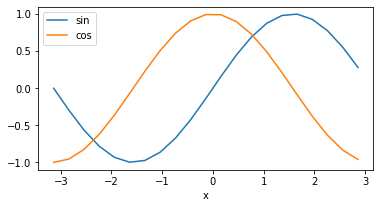

In [67]:
plt.figure()
df2.plot( x='x',            # 定義域のカラム
         y=['sin','cos'],   # 値域のカラム（複数指定可）
         figsize=(6,3))     # グラフのサイズ
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

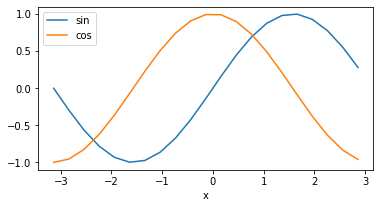

In [68]:
plt.figure()
df2.plot( x='x',            # 横軸のカラム
         y=['sin','cos'],   # 縦軸のカラム
         figsize=(6,3))     # グラフのサイズ
plt.savefig('plotSinCos01.eps')
plt.show()

#### 4.5.6.1 線の太さ，線種，マーカー

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

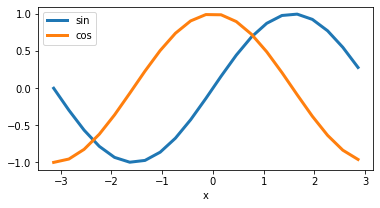

In [69]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3), lw=3)
plt.savefig('plotSinCos012.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

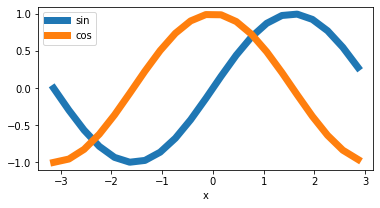

In [70]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3), lw=7)
plt.savefig('plotSinCos013.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

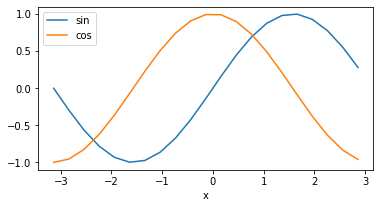

In [71]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3), ls='-')
plt.savefig('plotSinCos020.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

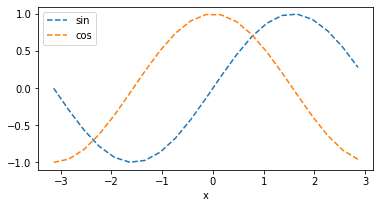

In [72]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3), ls='--')
plt.savefig('plotSinCos021.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

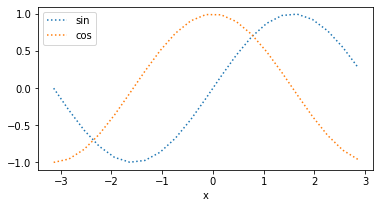

In [73]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3), ls=':')
plt.savefig('plotSinCos022.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

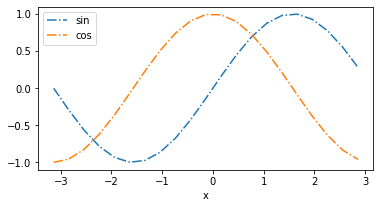

In [74]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3), ls='-.')
plt.savefig('plotSinCos023.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

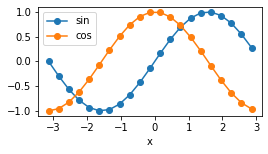

In [75]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), marker='o')
plt.savefig('plotSinCos031.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

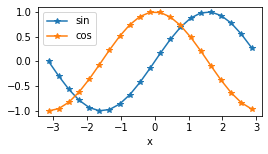

In [76]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), marker='*')
plt.savefig('plotSinCos032.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

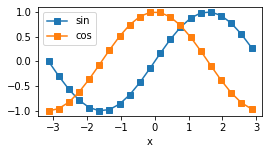

In [77]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), marker='s')
plt.savefig('plotSinCos033.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

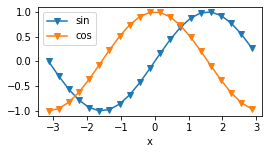

In [78]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), marker='v')
plt.savefig('plotSinCos034.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

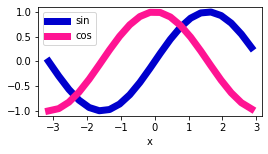

In [79]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), lw=7,color=['mediumblue','deeppink'] )
plt.savefig('plotSinCos041.eps')
plt.show()

<AxesSubplot:xlabel='x'>

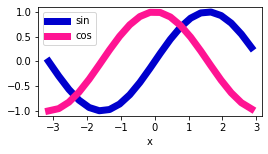

In [80]:
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), lw=7,color=['#0000cd','#ff1493'] )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

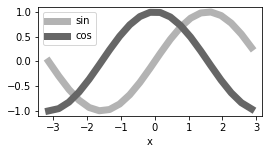

In [81]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(4,2), lw=7,color=['0.7','0.4'] )
plt.savefig('plotSinCos042.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

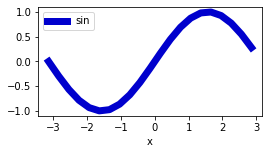

In [82]:
plt.figure()
df2.plot( x='x', y='sin', figsize=(4,2), lw=7,color='mediumblue' )
plt.savefig('plotSinCos043.eps')
plt.show()

### 4.5.7 グラフ描画に関する各種の設定

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

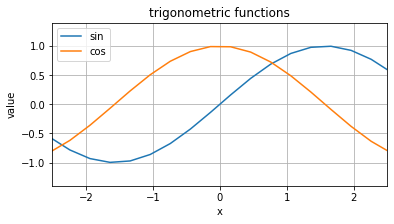

In [83]:
plt.figure()
df2.plot( x='x', y=['sin','cos'], figsize=(6,3))
plt.title('trigonometric functions')
plt.ylabel('value')
plt.xlim( -2.5, 2.5 )
plt.ylim( -1.4, 1.4 )
plt.grid()
plt.savefig('plotSinCos05.eps')
plt.show()

### 4.5.8 応用例：value_countsの結果をヒストグラムにする

In [84]:
# Intervalからプロパティを取り出す関数
def getL(v) : return( v.left )
def getR(v) : return( v.right )
def getC(v) : return( v.closed )
# Indexオブジェクトの全要素を展開
ixl = map( getL, B0.index.to_numpy() )
ixr = map( getR, B0.index.to_numpy() )
ixc = map( getC, B0.index.to_numpy() )

In [85]:
# DataFrameの作成
dfBins = pd.DataFrame( columns=['left','right','closed','freq'] )
# 値の設定
dfBins['left']   = list( ixl )
dfBins['right']  = list( ixr )
dfBins['closed'] = list( ixc )
dfBins['freq']   = B0.to_numpy()

In [86]:
dfHist = dfBins.sort_values('right')    # 区間の上限値で整列
display( dfHist.head(3) )               # 確認表示:先頭3行

left  right closed  freq
0 -3.759 -3.358  right     3
1 -3.358 -2.966  right    16
2 -2.966 -2.574  right    31

<Figure size 432x288 with 0 Axes>

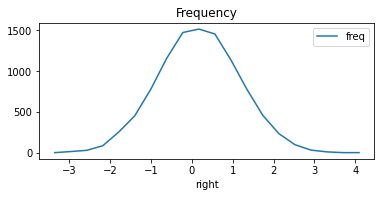

In [87]:
plt.figure()
dfHist.plot(x='right',y='freq', figsize=(6,2.5) )
plt.title('Frequency')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

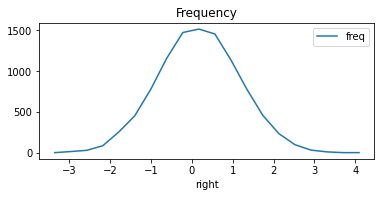

In [88]:
plt.figure()
dfHist.plot(x='right',y='freq', figsize=(6,2.5) )
plt.title('Frequency')
plt.savefig('plotHist01.eps')

### 4.5.9 円グラフの作成

In [89]:
g = [[20.894, 22.675],
     [14.867, 16.642],
     [ 5.045,  5.378],
     [ 3.843,  4.319]]
G = pd.DataFrame(g,index=['米国','中国','日本','ドイツ'],columns=['2020','2021'])
G

2020    2021
米国   20.894  22.675
中国   14.867  16.642
日本    5.045   5.378
ドイツ   3.843   4.319

C:\Users\katsu\AppData\Local\Temp\ipykernel_14240\3231095533.py:3: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.savefig('plotPie00.eps')
C:\Users\katsu\AppData\Local\Temp\ipykernel_14240\3231095533.py:3: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.savefig('plotPie00.eps')
C:\Users\katsu\AppData\Local\Temp\ipykernel_14240\3231095533.py:3: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  plt.savefig('plotPie00.eps')
C:\Users\katsu\AppData\Local\Temp\ipykernel_14240\3231095533.py:3: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  plt.savefig('plotPie00.eps')
C:\Users\katsu\AppData\Local\Temp\ipykernel_14240\3231095533.py:3: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.savefig('plotPie00.eps')
C:\Users\katsu\AppData\Local\Temp\ipykernel_14240\3231095533.py:3: UserWarning: Glyph 26085 (

<Figure size 432x288 with 0 Axes>

C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(byte

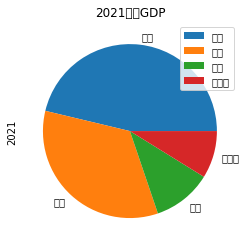

In [90]:
plt.figure()
G.plot(kind='pie',y='2021',title='2021年のGDP')
plt.savefig('plotPie00.eps')
plt.show()

#### 4.5.9.1 グラフ作成における日本語フォントの使用

In [91]:
import japanize_matplotlib

<Figure size 432x288 with 0 Axes>

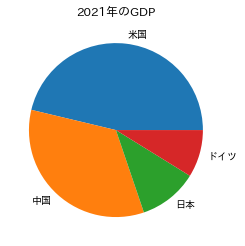

In [92]:
plt.figure()
G.plot(kind='pie',y='2021',title='2021年のGDP',legend=False,ylabel='')
plt.savefig('plotPie01.eps')
plt.show()

#### 4.5.9.2 円グラフ描画の開始角度と回転方向

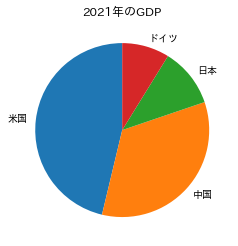

In [93]:
plt.figure()
G['2021'].plot.pie(title='2021年のGDP',ylabel='',startangle=90)
plt.savefig('plotPie021.eps')
plt.show()

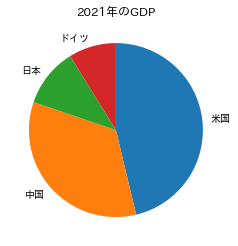

In [94]:
plt.figure()
G['2021'].plot.pie(title='2021年のGDP',ylabel='',startangle=90,counterclock=False)
plt.savefig('plotPie022.eps')
plt.show()

#### 4.5.9.3 扇部の突出，百分率の表示

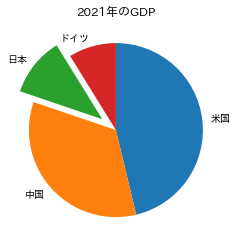

In [95]:
plt.figure()
e = [0,0,0.2,0]     # 突出率のリスト
G['2021'].plot.pie(title='2021年のGDP',ylabel='',startangle=90,counterclock=False,
                  explode=e)
plt.savefig('plotPie023.eps')
plt.show()

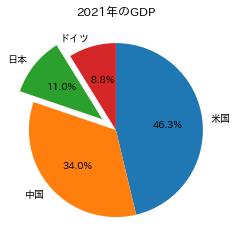

In [96]:
plt.figure()
e = [0,0,0.2,0]     # 突出率のリスト
G['2021'].plot.pie(title='2021年のGDP',ylabel='',startangle=90,counterclock=False,
                  explode=e,autopct='%4.1f%%')
plt.savefig('plotPie024.eps')
plt.show()

#### 4.5.9.4 扇部の色の設定

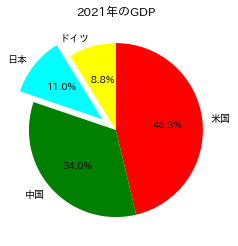

In [97]:
plt.figure()
e = [0,0,0.2,0]
c = ['red','green','cyan','yellow']    # 色名のリスト
G['2021'].plot.pie(title='2021年のGDP',ylabel='',startangle=90,counterclock=False,
                  explode=e,autopct='%4.1f%%',colors=c)
plt.savefig('plotPie031.eps')
plt.show()

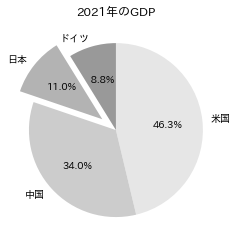

In [98]:
plt.figure()
e = [0,0,0.2,0]
c = ['0.9','0.8','0.7','0.6']     # 明るさのリスト
G['2021'].plot.pie(title='2021年のGDP',ylabel='',startangle=90,counterclock=False,
                  explode=e,autopct='%4.1f%%',colors=c)
plt.savefig('plotPie032.eps')
plt.show()

### 4.5.10 棒グラフの作成

<Figure size 432x288 with 0 Axes>

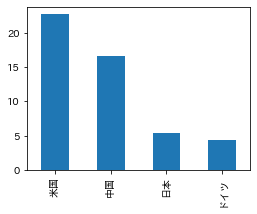

In [99]:
plt.figure()
G.plot(kind='bar',y='2021',legend=False,figsize=(4,3))
plt.savefig('plotBar00.eps')
plt.show()

<AxesSubplot:>

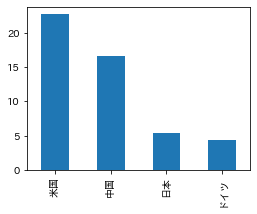

In [100]:
G['2021'].plot(kind='bar',figsize=(4,3))

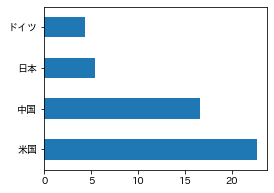

In [101]:
plt.figure()
G['2021'].plot(kind='barh',figsize=(4,3))
plt.savefig('plotBarh00.eps')
plt.show()

<AxesSubplot:>

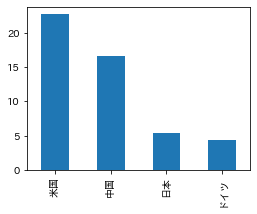

In [102]:
G['2021'].plot.bar(figsize=(4,3))

<AxesSubplot:>

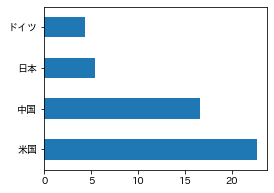

In [103]:
G['2021'].plot.barh(figsize=(4,3))

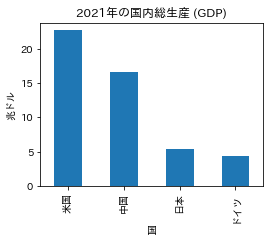

In [104]:
plt.figure()
G['2021'].plot.bar(figsize=(4,3),
                   xlabel='国',ylabel='兆ドル',title='2021年の国内総生産 (GDP)')
plt.savefig('plotBar01.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

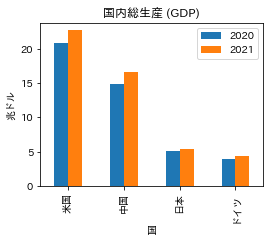

In [105]:
plt.figure()
G.plot.bar(figsize=(4,3),xlabel='国',ylabel='兆ドル',title='国内総生産 (GDP)')
plt.savefig('plotBar02.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

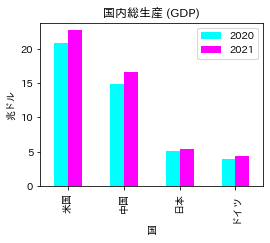

In [106]:
plt.figure()
c = ['cyan','magenta']    # 色のリスト
G.plot.bar(figsize=(4,3),xlabel='国',ylabel='兆ドル',title='国内総生産 (GDP)',
           color=c)
plt.savefig('plotBar03.eps')
plt.show()

### 4.5.11 散布図の作成

In [107]:
# データ系列1
x1 = stats.norm.rvs(loc=1,scale=1,size=200,random_state=1)
x2 = stats.norm.rvs(loc=8,scale=2,size=800,random_state=2)
x12 = np.append(x1,x2)
# データ系列1
y1 = stats.norm.rvs(loc=1,scale=1,size=200,random_state=3)
y2 = stats.norm.rvs(loc=8,scale=2,size=800,random_state=4)
y12 = np.append(y1,y2)

In [108]:
df5 = pd.DataFrame()
df5['x'] = x12;   df5['y'] = y12

<Figure size 432x288 with 0 Axes>

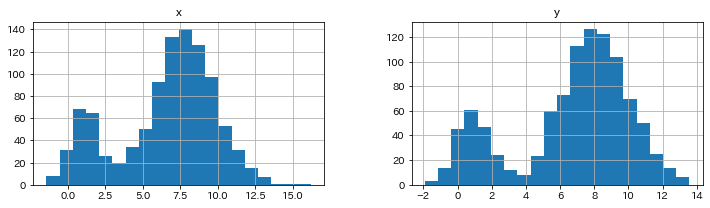

In [109]:
plt.figure()
df5.hist(bins=20,figsize=(12,3))
plt.savefig('plotScatter00.eps')
plt.show()

<Figure size 432x288 with 0 Axes>

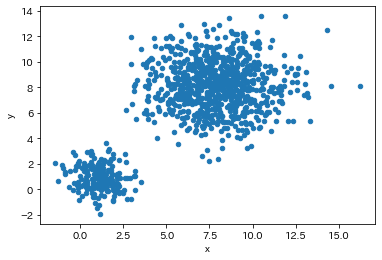

In [110]:
plt.figure()
df5.plot(kind='scatter',x='x',y='y')
plt.savefig('plotScatter01.eps')
plt.show()

<Figure size 432x288 with 0 Axes>

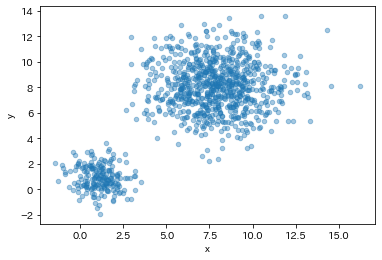

In [111]:
plt.figure()
df5.plot.scatter(x='x',y='y',alpha=0.4)
plt.savefig('plotScatter02.svg')
plt.show()